# Pymaceuticals Inc.
---

### Analysis

-
The overall goal of this analysis is to compare the performance of various treatment regimens against a company’s regimen named Capomulin. This has been done by taking and displaying various basic information like how many times mice were able to be observed during certain treatment as well as the sex percentages of the mice used. The size of the initial tumors was also checked compared to the average weight of the mice and there was some correlation found as heavier mice had larger tumors.
Overall Capomulin proved to be quite effective at treating tumors found on the mice. In one mouse’s tumor size was reduced to almost half its size by the end of the observation period. It also managed to have some of the smallest final tumor sizes by the end of the trials. The treatment Ramicane also managed to produce lower final tumor sizes, while Infubinol and Ceftamin still had relatively larger sizes by the end of the treatment observations.

The overall goal of this analysis is to compare the performance of various treatment regimens against a company’s regimen named Capomulin. This has been done by taking and displaying various basic information like how many times mice were able to be observed during certain treatment as well as the sex percentages of the mice used. The size of the initial tumors was also checked compared to the average weight of the mice and there was some correlation found as heavier mice had larger tumors.
Overall Capomulin proved to be quite effective at treating tumors found on the mice. In one mouse’s tumor size was reduced to almost half its size by the end of the observation period. It also managed to have some of the smallest final tumor sizes by the end of the trials. The treatment Ramicane also managed to produce lower final tumor sizes, while Infubinol and Ceftamin still had relatively larger sizes by the end of the treatment observations.

 

In [217]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
study_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [218]:
# Checking the number of mice.
mouse_count = len(study_data_complete["Mouse ID"].unique())
mouse_count

249

In [219]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupeMouse = study_data_complete[study_data_complete.duplicated()]
dupeMouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [220]:
# Optional: Get all the data for the duplicate mouse ID. 
dupeMouse = study_data_complete[study_data_complete[['Mouse ID','Timepoint']].duplicated() == True]
dupeMouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [221]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_complete = study_data_complete.loc[study_data_complete["Mouse ID"] != "g989" ]

In [222]:
# Checking the number of mice in the clean DataFrame.

mouse_count = len(study_data_complete["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [223]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
study_mean = study_data_complete.groupby(["Drug Regimen"]).mean()
study_mean = study_mean["Tumor Volume (mm3)"]

study_median = study_data_complete.groupby(["Drug Regimen"]).median()
study_median = study_median["Tumor Volume (mm3)"]

study_var = study_data_complete.groupby(["Drug Regimen"]).var()
study_var = study_var["Tumor Volume (mm3)"]

study_sems = study_data_complete.groupby(["Drug Regimen"]).sem()
study_sems = study_sems["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drugSum = pd.concat([study_mean,study_median,study_var,study_sems], axis=1,join = "inner")
drugSum.columns = ["Mean", "Median", "Variance", "SEMS"]


drugSum

,Mean,Median,Variance,SEMS
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


In [224]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

drug_sum2=study_data_complete[["Drug Regimen","Tumor Volume (mm3)"]]
drug_sum2 = drug_sum2.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)' : ['mean', 'median',"var","sem"]})
drug_sum2

Tumor Volume (mm3)                                
                           mean     median        var       sem
Drug Regimen                                                   
Capomulin             40.675741  41.557809  24.947764  0.329346
Ceftamin              52.591172  51.776157  39.290177  0.469821
Infubinol             52.884795  51.820584  43.128684  0.492236
Ketapril              55.235638  53.698743  68.553577  0.603860
Naftisol              54.331565  52.509285  66.173479  0.596466
Placebo               54.033581  52.288934  61.168083  0.581331
Propriva              52.320930  50.446266  43.852013  0.544332
Ramicane              40.216745  40.673236  23.486704  0.320955
Stelasyn              54.233149  52.431737  59.450562  0.573111
Zoniferol             53.236507  51.818479  48.533355  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

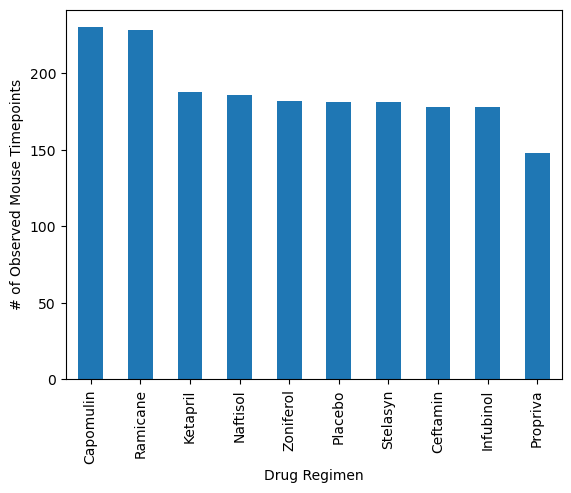

In [225]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regcount = study_data_complete.groupby(["Drug Regimen"]).count()


regcount = regcount ["Mouse ID"]
regcount = regcount.sort_values(ascending=False)
regcount_frame=regcount.to_frame()
reg_Count_Plot = regcount.plot.bar()
reg_Count_Plot.set_xlabel("Drug Regimen")
reg_Count_Plot.set_ylabel("# of Observed Mouse Timepoints")

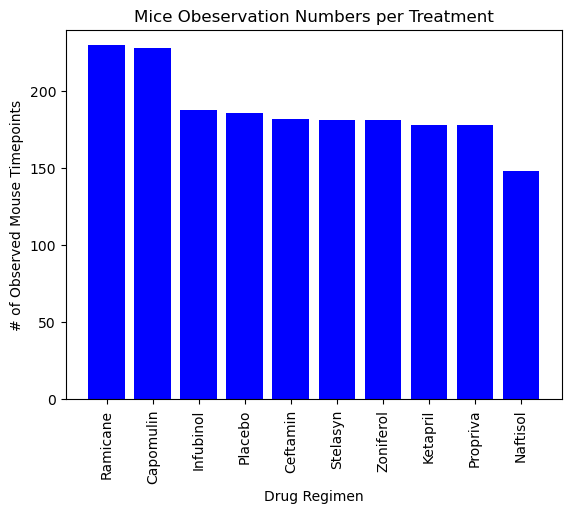

In [226]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regcount
Drug_Reg = study_data_complete["Drug Regimen"].unique()
x_axis = np.arange(len(Drug_Reg))
plt.bar(x_axis, regcount, color="b", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Drug_Reg)

plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.ylabel("# of Observed Mouse Timepoints")
plt.ylim(0, max(regcount)+10)
plt.title("Mice Obeservation Numbers per Treatment")
plt.show()


In [227]:
mouse_by_sex = study_data_complete.groupby(['Sex'])

# Create a new variable that holds the sum of our groups
mouse_sum = mouse_by_sex[['Mouse ID']].count()
mouse_sum.head(20)


,Mouse ID
Sex,
Female,922
Male,958


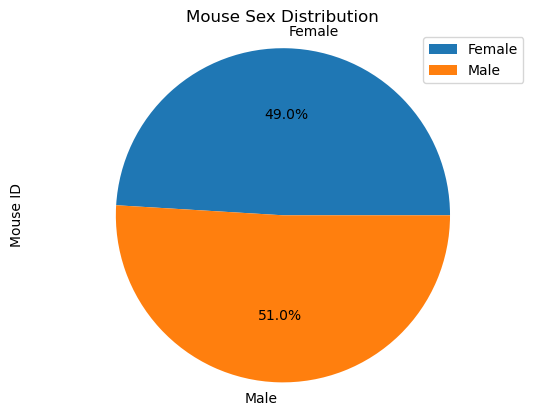

In [228]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sum.plot.pie(y='Mouse ID',autopct="%1.1f%%")
plt.axis("equal")
plt.title("Mouse Sex Distribution")
plt.show()

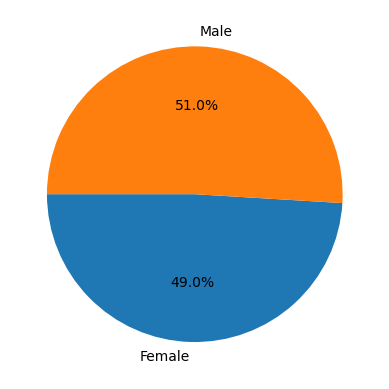

In [229]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouseSum = mouse_sum["Mouse ID"]
mouseLabels = ["Female","Male"]

plt.pie(mouseSum, labels=mouseLabels,
        autopct="%1.1f%%", startangle=180)
plt.show()


## Quartiles, Outliers and Boxplots

In [230]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin
# # Start by getting the last (greatest) timepoint for each mouse
max_Timepoint = study_data_complete.groupby(["Mouse ID"])["Timepoint"].max()
max_Timepoint = max_Timepoint.reset_index()

max_Timepoint = max_Timepoint.merge(study_data_complete, how= "left" , on = ["Mouse ID", "Timepoint"])

max_Timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [231]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_Reg  = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []
# # Calculate the IQR and quantitatively determine if there are any potential outliers.

for regimen in Drug_Reg:
    finalVol = max_Timepoint.loc[(max_Timepoint["Drug Regimen"] == regimen),"Tumor Volume (mm3)"] # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol.append(finalVol)# add subset 
    quartiles = finalVol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
     
    # Determine outliers using upper and lower bounds
    outliers = finalVol.loc[(finalVol < lower_bound)|(finalVol > upper_bound)]

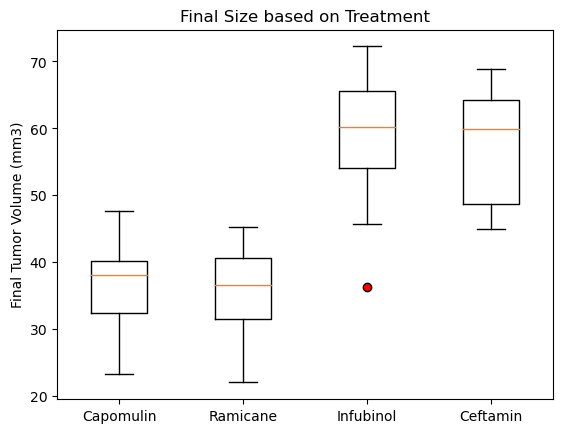

In [232]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol,flierprops={'markerfacecolor': 'red'})
ax1.set_xticklabels(Drug_Reg)
plt.title("Final Size based on Treatment")
plt.show()


## Line and Scatter Plots

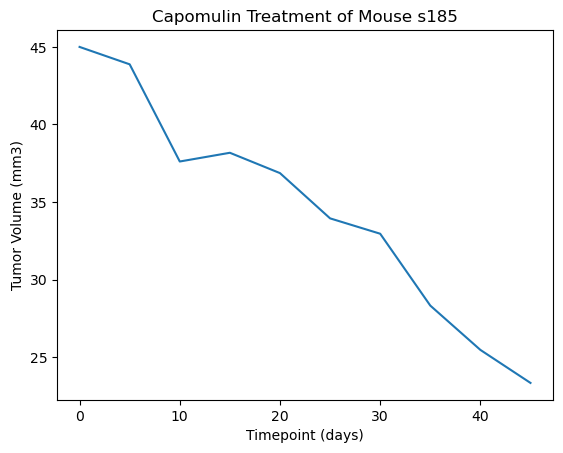

In [233]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo = study_data_complete.loc[(study_data_complete["Drug Regimen"] == "Capomulin")]
capo_Line = capo.loc[(study_data_complete["Mouse ID"] == "s185")]

x_axis = capo_Line["Timepoint"]
tumor_size = capo_Line["Tumor Volume (mm3)"]
plt.plot(x_axis, tumor_size)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin Treatment of Mouse s185")


plt.show()


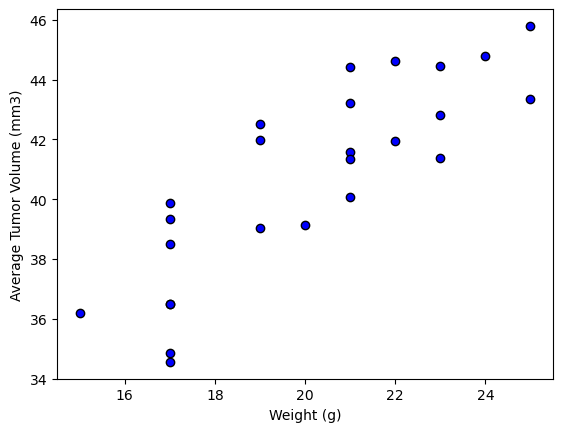

In [234]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_Tumor_Mean = capo.groupby(["Mouse ID"]).mean(["Tumor Volume (mm3)"])
capo_Tumor_Mean

Tum_vol = capo_Tumor_Mean["Tumor Volume (mm3)"]
weight = capo_Tumor_Mean["Weight (g)"]

plt.scatter(weight, Tum_vol, marker="o", facecolors="blue", edgecolors="black")

plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

plt.show()



## Correlation and Regression

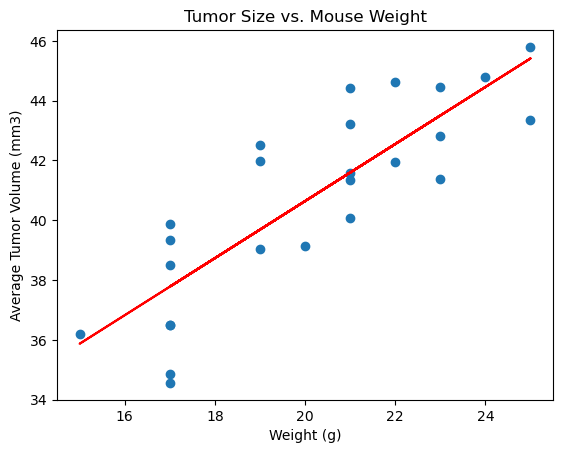

In [235]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
reg = stats.linregress(weight, Tum_vol)
LR_slope, LR_int, LR_r, LR_p, LR_std_err = stats.linregress(weight, Tum_vol)
LR_fit = LR_slope * weight + LR_int

corr = {round(st.pearsonr(weight,Tum_vol)[0],2)}

plt.scatter(weight,Tum_vol)
plt.plot(weight,LR_fit,color = "red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Tumor Size vs. Mouse Weight")
plt.show()
